# procedures

1. determine graph type:
    1. line grpah with different color,
    2. scatter graph with different symbol
2. determine axis:
    1. linear
    2. log
3. tell if there is rotation
4. determine horizental and vertical boxes, get box cooridnate
5. erase all boxes
6. calculate real cordiante

# finished work

specify a color in a line plot, obtain data points

## install packages

In [6]:
!pip install paddlepaddle paddleocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 14.2 MB/s eta 0:00:00


In [7]:
# Download the font file correctly
!wget -O simfang.ttf https://github.com/PaddlePaddle/PaddleOCR/raw/release/2.6/doc/fonts/simfang.ttf



--2025-01-16 03:18:28--  https://github.com/PaddlePaddle/PaddleOCR/raw/release/2.6/doc/fonts/simfang.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.6/doc/fonts/simfang.ttf [following]
--2025-01-16 03:18:28--  https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.6/doc/fonts/simfang.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10576012 (10M) [application/octet-stream]
Saving to: ‘simfang.ttf’

simfang.ttf         100%[===================>]  10.09M  --.-KB/s    in 0.1s    

2025-01-16 03:18:29 (99.0 MB/s) - ‘simfang.ttf’ saved [10576012/105

--2025-01-16 04:12:23--  https://raw.githubusercontent.com/HaoleiH/AI-driven-projects/refs/heads/main/line_plot_digitizer/example3.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127273 (124K) [image/png]
Saving to: ‘example3.png’

example3.png        100%[===================>] 124.29K  --.-KB/s    in 0.03s   

2025-01-16 04:12:24 (4.77 MB/s) - ‘example3.png’ saved [127273/127273]



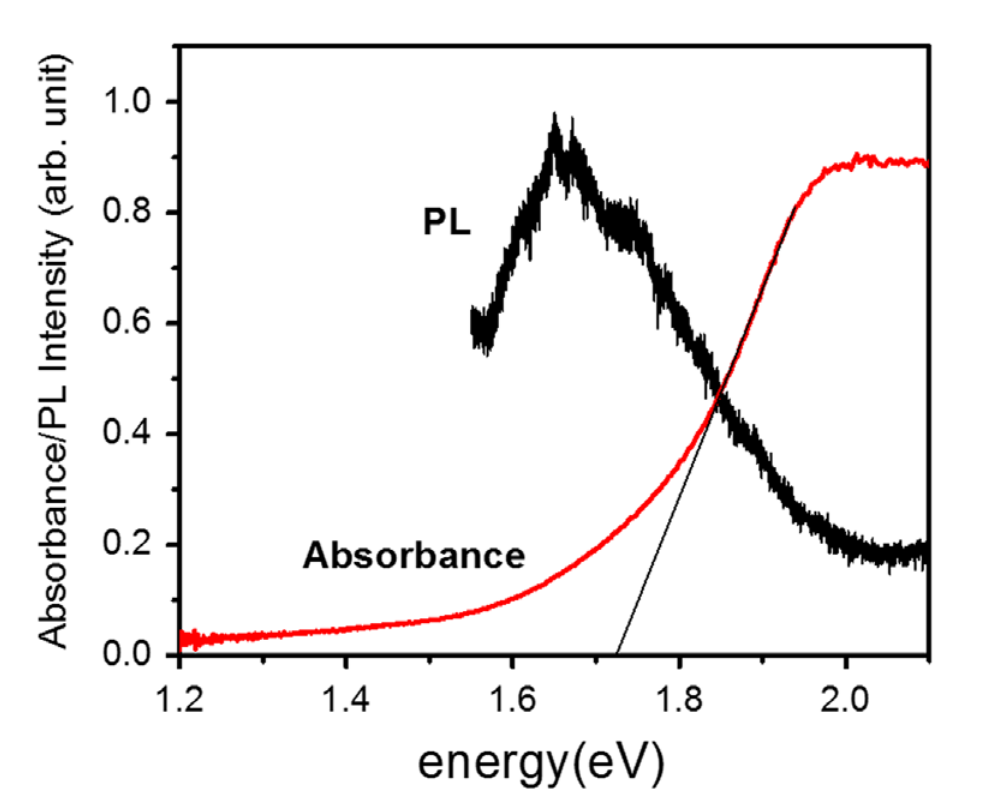

In [46]:
# download example graph
!wget -O example3.png https://raw.githubusercontent.com/HaoleiH/AI-driven-projects/refs/heads/main/line_plot_digitizer/example3.png
from IPython.display import Image as Image2
display(Image2('example3.png'))

## obtain pixels with certain color from the graph

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddleocr import PaddleOCR, draw_ocr

In [48]:


def find_color_coordinates(image_path, target_color, threshold):
    """
    Load an image and find the coordinates of pixels matching a specified color within a given Euclidean distance.

    Args:
        image_path (str): Path to the image file.
        target_color (tuple): Target color as an (R, G, B) tuple.
        threshold (float): Euclidean distance threshold for matching the color.

    Returns:
        list: List of (x, y) coordinates where the color matches.
    """
    # Load the image and convert to RGB
    img_array = np.array(Image.open(image_path).convert("RGB"))

    # Compute the squared Euclidean distance for efficiency
    target_color = np.array(target_color)
    distances_sq = np.sum((img_array - target_color) ** 2, axis=-1)

    # Create a mask for pixels within the distance threshold
    mask = distances_sq <= threshold ** 2

    # Extract matching pixel coordinates
    coordinates = np.argwhere(mask)[:, [1, 0]].tolist()  # Convert (row, col) to (x, y)

    return coordinates


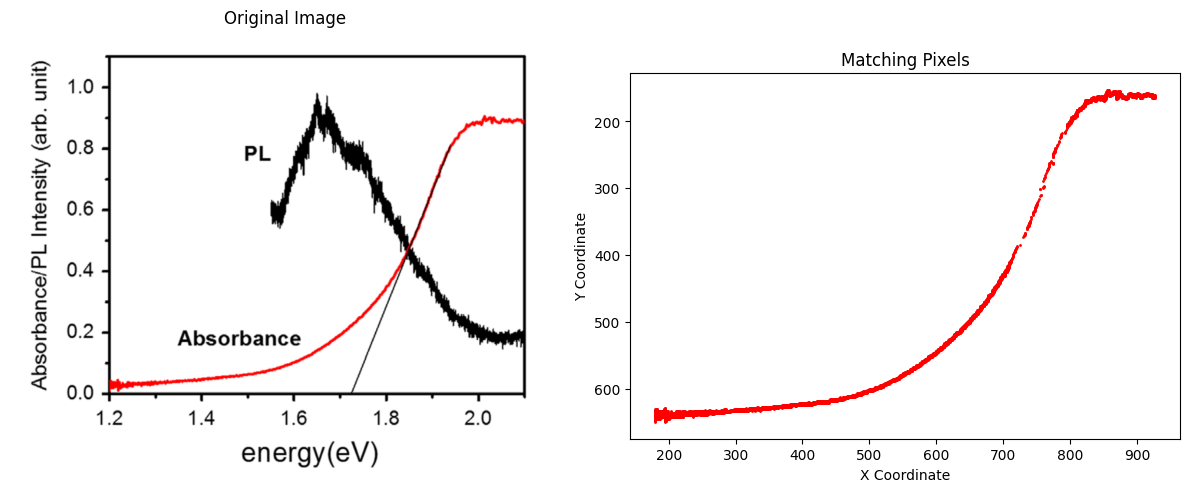

In [49]:

# Configuration
image_path = "example3.png"  # Replace with your image file path
target_color = (255, 0, 0)  # Target color (red) as an (R, G, B) tuple
threshold = 50.0  # Euclidean distance threshold

# Find coordinates of matching pixels
coordinates = np.array(find_color_coordinates(image_path, target_color, threshold))

if coordinates.size > 0:
    # Extract x and y coordinates
    x, y = coordinates[:, 0], coordinates[:, 1]

    # Plotting the original image and matching pixels
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    ax[0].imshow(Image.open(image_path))
    ax[0].axis('off')
    ax[0].set_title("Original Image")

    # Scatter plot of matching pixels
    ax[1].scatter(x, y, color='red', s=1)  # Smaller marker size for clarity
    ax[1].invert_yaxis()  # Match image coordinate system
    ax[1].set_aspect('equal')
    ax[1].set_title("Matching Pixels")
    ax[1].set_xlabel("X Coordinate")
    ax[1].set_ylabel("Y Coordinate")

    plt.tight_layout()
    plt.show()
else:
    print("No matching pixels found within the specified threshold.")


## find label position

[2025/01/16 04:13:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

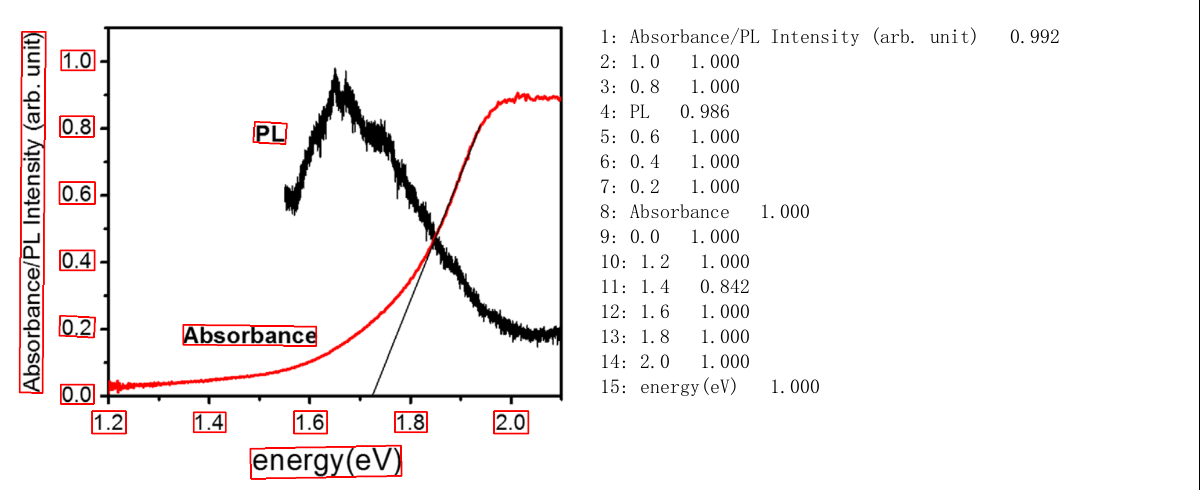

In [50]:

# Configuration
IMG_PATH = "/content/example3.png"  # Path to the input image
FONT_PATH = 'simfang.ttf'  # Path to the font file for drawing text
LANG = 'en'  # Language for OCR: 'en', 'ch', etc.

def perform_ocr(img_path, font_path, lang='en'):
    """
    Perform OCR on the given image and display results.

    Args:
        img_path (str): Path to the image file.
        font_path (str): Path to the font file for rendering text.
        lang (str): Language for OCR model (default is 'en').

    Returns:
        None
    """
    # Initialize the PaddleOCR model
    ocr = PaddleOCR(use_angle_cls=True, lang=lang)

    # Perform OCR
    results = ocr.ocr(img_path, cls=True)

    if not results:
        print("No text detected in the image.")
        return

    # Process OCR results
    result = results[0]  # Assuming single image input
    boxes = [line[0] for line in result]  # Bounding boxes
    texts = [line[1][0] for line in result]  # Detected texts
    scores = [line[1][1] for line in result]  # Confidence scores

    # Print OCR results
    print("\nDetected Texts and Confidence Scores:")
    for text, score in zip(texts, scores):
        print(f"Text: '{text}', Confidence: {score:.2f}")

    # Visualize OCR results
    image = Image.open(img_path).convert('RGB')
    annotated_image = draw_ocr(image, boxes, texts, scores, font_path=font_path)
    annotated_image = Image.fromarray(annotated_image)

    # Display the resulting image
    display(annotated_image)
    return result

# Execute OCR
result = perform_ocr(IMG_PATH, FONT_PATH, LANG)


### obtain labels with pure numbers

In [51]:
import re

def is_float(string):
    """
    Check if a string represents a float number.

    Args:
        string (str): The string to check.

    Returns:
        bool: True if the string is a float, otherwise False.
    """
    return bool(re.match(r"^[+-]?(\d+(\.\d*)?|\.\d+)$", string))

# Extract axis labels
axis_label = [res for res in result if is_float(res[1][0])]


In [52]:
axis_label

[[[[101.0, 83.0], [156.0, 83.0], [156.0, 116.0], [101.0, 116.0]],
  ('1.0', 0.9998062252998352)],
 [[[99.0, 192.0], [155.0, 192.0], [155.0, 226.0], [99.0, 226.0]],
  ('0.8', 0.9998891949653625)],
 [[[98.0, 301.0], [157.0, 301.0], [157.0, 337.0], [98.0, 337.0]],
  ('0.6', 0.9998779296875)],
 [[[99.0, 414.0], [156.0, 414.0], [156.0, 447.0], [99.0, 447.0]],
  ('0.4', 0.9999081492424011)],
 [[[99.0, 522.0], [157.0, 525.0], [155.0, 558.0], [98.0, 555.0]],
  ('0.2', 0.9998580813407898)],
 [[[100.0, 636.0], [155.0, 636.0], [155.0, 668.0], [100.0, 668.0]],
  ('0.0', 0.9997901320457458)],
 [[[152.0, 680.0], [208.0, 680.0], [208.0, 717.0], [152.0, 717.0]],
  ('1.2', 0.999864399433136)],
 [[[320.0, 682.0], [373.0, 682.0], [373.0, 715.0], [320.0, 715.0]],
  ('1.4', 0.8420750498771667)],
 [[[486.0, 680.0], [541.0, 680.0], [541.0, 717.0], [486.0, 717.0]],
  ('1.6', 0.9998869895935059)],
 [[[653.0, 681.0], [706.0, 681.0], [706.0, 715.0], [653.0, 715.0]],
  ('1.8', 0.999912440776825)],
 [[[817.0, 680.

### find x and y axis labels

In [53]:
import numpy as np
from collections import defaultdict

def group_rectangles(rectangles, tolerance=5):
    """
    Group rectangles by similar x and y coordinates within a specified tolerance.

    Args:
        rectangles (list): List of rectangles, each defined as a list of (x, y) tuples.
        tolerance (int): Tolerance value for grouping coordinates.

    Returns:
        tuple: Two lists of grouped rectangle indices, one for x-coordinates and one for y-coordinates.
    """
    # Initialize groups
    x_groups = defaultdict(list)
    y_groups = defaultdict(list)

    for i, rect in enumerate(rectangles):
        # Compute mean x and y coordinates for the rectangle
        x_mean = np.mean([point[0] for point in rect])
        y_mean = np.mean([point[1] for point in rect])

        # Group by x
        added_to_x = False
        for key in list(x_groups.keys()):  # Avoid modifying the dictionary during iteration
            if abs(key - x_mean) <= tolerance:
                x_groups[key].append(i)
                added_to_x = True
                break
        if not added_to_x:
            x_groups[x_mean].append(i)

        # Group by y
        added_to_y = False
        for key in list(y_groups.keys()):
            if abs(key - y_mean) <= tolerance:
                y_groups[key].append(i)
                added_to_y = True
                break
        if not added_to_y:
            y_groups[y_mean].append(i)

    # Sort groups by size in descending order
    x_group_list = sorted(x_groups.values(), key=len, reverse=True)
    y_group_list = sorted(y_groups.values(), key=len, reverse=True)

    return x_group_list, y_group_list


rectangles = [i[0] for i in axis_label]
x_groups, y_groups = group_rectangles(rectangles, tolerance=5)

print("Rectangles grouped by similar x-coordinates:", x_groups)
print("Rectangles grouped by similar y-coordinates:", y_groups)


Rectangles grouped by similar x-coordinates: [[0, 1, 2, 3, 4, 5], [6], [7], [8], [9], [10]]
Rectangles grouped by similar y-coordinates: [[6, 7, 8, 9, 10], [0], [1], [2], [3], [4], [5]]


### show identified x and y axes

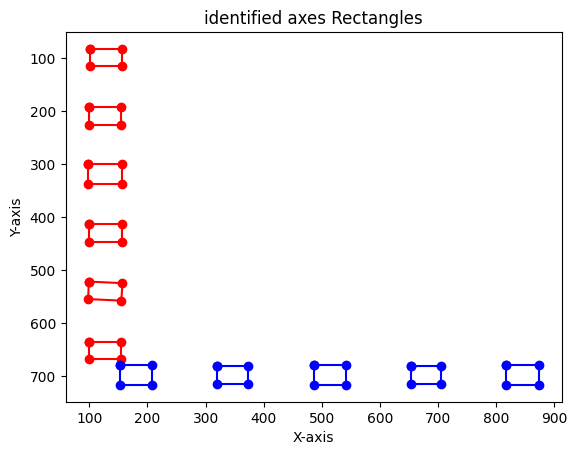

In [54]:
def draw_rectangle(coordinates, color):
  """Draws a rectangle based on four coordinate points.

  Args:
    coordinates: A list of four tuples, where each tuple represents
                 the (x, y) coordinates of a corner of the rectangle.
  """
  x, y = zip(*coordinates)
  plt.plot(x + (x[0],), y + (y[0],), marker='o', linestyle='-',color=color)
  #plt.invert_yaxis()
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("identified axes Rectangles")



plt.figure(1)
for i in x_groups[0]:
    draw_rectangle(axis_label[i][0], "red")
for i in y_groups[0]:
  draw_rectangle(axis_label[i][0], "blue")

ax = plt.gca()
ax.invert_yaxis()
plt.show()

## transform curve coordiante from pixel index to real space coordiante

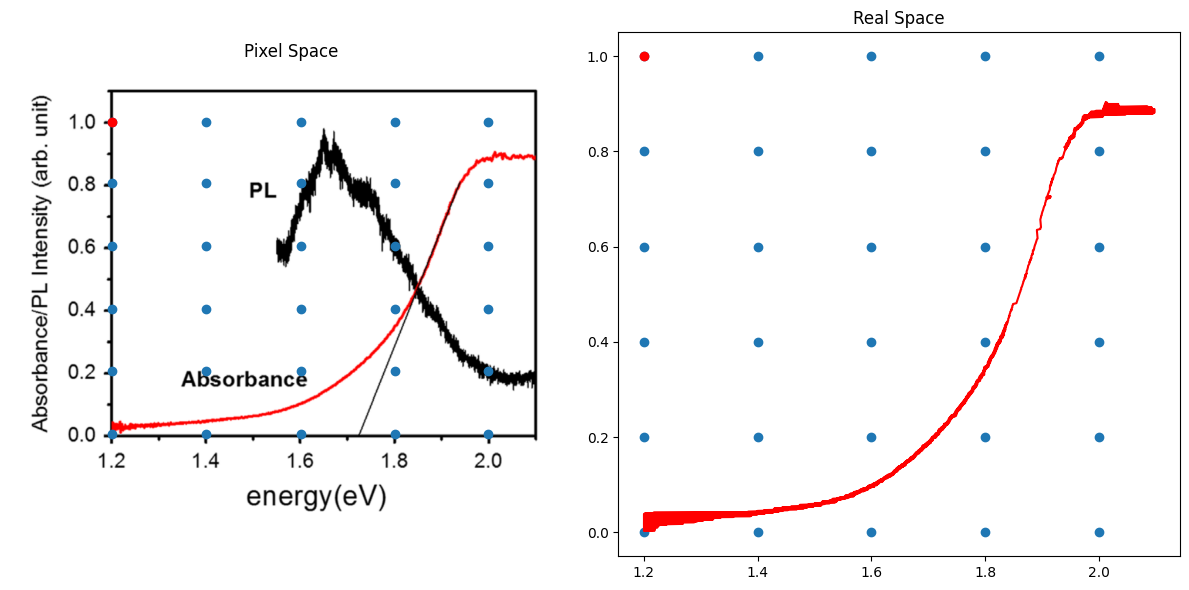

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Extract real and pixel coordinates for the y-axis
yaxis_real = [float(axis_label[i][1][0]) for i in x_groups[0]]
yaxis_pixel = [np.mean(axis_label[i][0], axis=0)[1] for i in x_groups[0]]

# Compute y-axis pixel-to-distance conversion
y_pixel_to_distance = np.polyfit(yaxis_pixel, yaxis_real, 1)[0]

# Extract real and pixel coordinates for the x-axis
xaxis_real = [float(axis_label[i][1][0]) for i in y_groups[0]]
xaxis_pixel = [np.mean(axis_label[i][0], axis=0)[0] for i in y_groups[0]]

# Compute x-axis pixel-to-distance conversion
x_pixel_to_distance = np.polyfit(xaxis_pixel, xaxis_real, 1)[0]

# Generate mesh grids for real and pixel coordinates
mesh_real_x, mesh_real_y = np.meshgrid(xaxis_real, yaxis_real)
mesh_pixel_x, mesh_pixel_y = np.meshgrid(xaxis_pixel, yaxis_pixel)

# Curve coordinates in pixel space
curve_pixel_x, curve_pixel_y = coordinates[:, 0], coordinates[:, 1]

def transform_coordinates(curve_x, curve_y, x1, y1, x2, y2, l1, l2):
    """
    Transforms coordinates of a curve from an old system to a new one.

    Args:
        curve_x (array): X-coordinates of the curve in the old system.
        curve_y (array): Y-coordinates of the curve in the old system.
        x1, y1 (float): Coordinates of a known point in the old system.
        x2, y2 (float): Coordinates of the same point in the new system.
        l1, l2 (float): Scale factors for x and y axes.

    Returns:
        tuple: Transformed x and y coordinates in the new system.
    """
    displacement_x = x2 - (x1 * l1)
    displacement_y = y2 - (y1 * l2)

    transformed_x = (curve_x * l1) + displacement_x
    transformed_y = (curve_y * l2) + displacement_y

    return transformed_x, transformed_y

# Transform curve coordinates from pixel space to real space
curve_real_x, curve_real_y = transform_coordinates(
    curve_pixel_x, curve_pixel_y,
    mesh_pixel_x[0, 0], mesh_pixel_y[0, 0],
    mesh_real_x[0, 0], mesh_real_y[0, 0],
    x_pixel_to_distance, y_pixel_to_distance
)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pixel space visualization
ax[0].imshow(Image.open("/content/example3.png"))
ax[0].scatter(mesh_pixel_x, mesh_pixel_y, label="Pixel Grid")
ax[0].scatter(mesh_pixel_x[0, 0], mesh_pixel_y[0, 0], color="r", label="Origin")
ax[0].axis('off')
ax[0].legend().set_visible(False)
ax[0].set_title("Pixel Space")

# Real space visualization
ax[1].scatter(mesh_real_x, mesh_real_y, label="Real Grid")
ax[1].scatter(mesh_real_x[0, 0], mesh_real_y[0, 0], color="r", label="Origin")
ax[1].plot(curve_real_x, curve_real_y, color="r", label="Transformed Curve")
ax[1].legend().set_visible(False)
ax[1].set_title("Real Space")

plt.tight_layout()
plt.show()


## save curve coordinates(final result)

In [56]:


import pandas as pd

final_data=pd.DataFrame({"x":curve_real_x,"y":curve_real_y})

final_data.to_csv("final_data.csv")

final_data

,x,y
0,2.012499,0.903156
1,2.013701,0.903156
2,2.011297,0.901346
3,2.012499,0.901346
4,2.013701,0.901346
...,...,...
3633,1.216827,0.005312
3634,1.218029,0.005312
3635,1.219231,0.005312
3636,1.200000,0.003502
